# Importe modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *
#import geopandas
from eofs.xarray import Eof
from eofs.multivariate.standard import MultivariateEof

# Plotting modules 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm

# Scikit-learn
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

# Functions definition

In [2]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import get_3D_budget_xarr
from Fonctions import get_3D_xarr
from Fonctions import get_3D_SW_xarr
from Fonctions import get_3D_LW_xarr

# Settings

In [100]:
ENSEMBLE = 'ENSEMBLE4_selection/'
path_official = '/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE_short = '/data/scratch/globc/peatier/CNRM-CM6-1_PPE/'
variable = 'tas'
variable_cmip6 = ['tas']

In [101]:
nb_p_list_LHS500 = ['p830', 'p831', 'p832', 'p833', 'p834', 'p835']
len(nb_p_list_LHS500)

6

# EOF, tas_mean and PCs

In [102]:
Mean =  pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_'+variable+'_mean.npy').to_xarray().to_array()
Mean = Mean[0,:,:].rename({'variable':'mode'})
Mean

<xarray.DataArray (lat: 128, lon: 256)>
array([[225.46432, 225.46432, 225.46432, ..., 225.46432, 225.46432,
        225.46432],
       [228.17479, 228.17479, 228.17479, ..., 228.17479, 228.17479,
        228.17479],
       [228.09329, 228.09329, 228.09329, ..., 228.4864 , 228.09329,
        228.09329],
       ...,
       [256.31323, 256.31323, 256.31323, ..., 256.2571 , 256.31323,
        256.31323],
       [255.51013, 255.51013, 255.51013, ..., 255.51013, 255.51013,
        255.51013],
       [254.2393 , 254.2393 , 254.2393 , ..., 254.2393 , 254.2393 ,
        254.2393 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
    mode     <U7 'tasmean'

In [103]:
anom =  pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_'+variable+'_anom.npy').to_xarray().to_array()
anom = anom[0,:,:].rename({'variable':'mode'})
anom

<xarray.DataArray (time: 103, lat: 128, lon: 256)>
array([[[-1.2145233 , -1.2145233 , -1.2145233 , ..., -1.2145233 ,
         -1.2145233 , -1.2145233 ],
        [-1.7260742 , -1.7260742 , -1.7260742 , ..., -1.7260742 ,
         -1.7260742 , -1.7260742 ],
        [-1.9269562 , -1.9269562 , -1.9269562 , ..., -1.8670654 ,
         -1.9269562 , -1.9269562 ],
        ...,
        [ 0.72772217,  0.72772217,  0.72772217, ...,  0.6560974 ,
          0.72772217,  0.72772217],
        [ 0.94644165,  0.94644165,  0.94644165, ...,  0.94644165,
          0.94644165,  0.94644165],
        [ 1.6649475 ,  1.6649475 ,  1.6649475 , ...,  1.6649475 ,
          1.6649475 ,  1.6649475 ]],

       [[ 2.9646912 ,  2.9646912 ,  2.9646912 , ...,  2.9646912 ,
          2.9646912 ,  2.9646912 ],
        [ 3.1278687 ,  3.1278687 ,  3.1278687 , ...,  3.1278687 ,
          3.1278687 ,  3.1278687 ],
        [ 3.3751526 ,  3.3751526 ,  3.3751526 , ...,  3.3284302 ,
          3.3751526 ,  3.3751526 ],
        ...,
        [-0.4899292 , -0.4899292 , -0.4899292 , ..., -0.4925995 ,
         -0.4899292 , -0.4899292 ],
        [-0.44721985, -0.44721985, -0.44721985, ..., -0.44721985,
         -0.44721985, -0.44721985],
        [-0.40856934, -0.40856934, -0.40856934, ..., -0.40856934,
         -0.40856934, -0.40856934]],

       [[-1.529129  , -1.529129  , -1.529129  , ..., -1.529129  ,
         -1.529129  , -1.529129  ],
        [-1.2806549 , -1.2806549 , -1.2806549 , ..., -1.2806549 ,
         -1.2806549 , -1.2806549 ],
        [-1.3550415 , -1.3550415 , -1.3550415 , ..., -1.2836456 ,
         -1.3550415 , -1.3550415 ],
        ...,
        [-0.15060425, -0.15060425, -0.15060425, ..., -0.11621094,
         -0.15060425, -0.15060425],
        [ 0.20750427,  0.20750427,  0.20750427, ...,  0.20750427,
          0.20750427,  0.20750427],
        [ 0.01316833,  0.01316833,  0.01316833, ...,  0.01316833,
          0.01316833,  0.01316833]],

       ...,

       [[ 0.32736206,  0.32736206,  0.32736206, ...,  0.32736206,
          0.32736206,  0.32736206],
        [-0.48031616, -0.48031616, -0.48031616, ..., -0.48031616,
         -0.48031616, -0.48031616],
        [-0.44070435, -0.44070435, -0.44070435, ..., -0.4653015 ,
         -0.44070435, -0.44070435],
        ...,
        [ 0.09420776,  0.09420776,  0.09420776, ...,  0.1673584 ,
          0.09420776,  0.09420776],
        [ 0.17530823,  0.17530823,  0.17530823, ...,  0.17530823,
          0.17530823,  0.17530823],
        [ 0.47372437,  0.47372437,  0.47372437, ...,  0.47372437,
          0.47372437,  0.47372437]],

       [[-2.0811005 , -2.0811005 , -2.0811005 , ..., -2.0811005 ,
         -2.0811005 , -2.0811005 ],
        [-2.4424133 , -2.4424133 , -2.4424133 , ..., -2.4424133 ,
         -2.4424133 , -2.4424133 ],
        [-2.723404  , -2.723404  , -2.723404  , ..., -2.6242828 ,
         -2.723404  , -2.723404  ],
        ...,
        [-2.8255005 , -2.8255005 , -2.8255005 , ..., -2.8328705 ,
         -2.8255005 , -2.8255005 ],
        [-2.9595642 , -2.9595642 , -2.9595642 , ..., -2.9595642 ,
         -2.9595642 , -2.9595642 ],
        [-3.1158752 , -3.1158752 , -3.1158752 , ..., -3.1158752 ,
         -3.1158752 , -3.1158752 ]],

       [[-2.2855225 , -2.2855225 , -2.2855225 , ..., -2.2855225 ,
         -2.2855225 , -2.2855225 ],
        [-2.5156097 , -2.5156097 , -2.5156097 , ..., -2.5156097 ,
         -2.5156097 , -2.5156097 ],
        [-2.6567688 , -2.6567688 , -2.6567688 , ..., -2.6122437 ,
         -2.6567688 , -2.6567688 ],
        ...,
        [-1.8006439 , -1.8006439 , -1.8006439 , ..., -1.806839  ,
         -1.8006439 , -1.8006439 ],
        [-2.3363647 , -2.3363647 , -2.3363647 , ..., -2.3363647 ,
         -2.3363647 , -2.3363647 ],
        [-2.6740875 , -2.6740875 , -2.6740875 , ..., -2.6740875 ,
         -2.6740875 , -2.6740875 ]]], dtype=float32)
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 ... 94 95 96 97 98 99 100 101 102
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 8

In [104]:
eof1 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap1_'+variable+'.npy').to_xarray().to_array()
eof2 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap2_'+variable+'.npy').to_xarray().to_array()
eof3 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap3_'+variable+'.npy').to_xarray().to_array()
eof4 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap4_'+variable+'.npy').to_xarray().to_array()
eof5 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap5_'+variable+'.npy').to_xarray().to_array()

eof1 = eof1[0,:,:].rename({'variable':'mode'})
eof2 = eof2[0,:,:].rename({'variable':'mode'})
eof3 = eof3[0,:,:].rename({'variable':'mode'})
eof4 = eof4[0,:,:].rename({'variable':'mode'})
eof5 = eof5[0,:,:].rename({'variable':'mode'})

eofs = [eof1,eof2,eof3,eof4,eof5]

In [105]:
eofs_combined = xr.combine_nested(eofs, concat_dim='eofs')
#eofs_combined

In [106]:
pc1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF1pc_'+variable+'.npy')
pc2 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF2pc_'+variable+'.npy')
pc3 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF3pc_'+variable+'.npy')
pc4 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF4pc_'+variable+'.npy')
pc5 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF5pc_'+variable+'.npy')

PC_df = pd.DataFrame(pc1)
PC_df['pc1'] = pc1
PC_df['pc2'] = pc2
PC_df['pc3'] = pc3
PC_df['pc4'] = pc4
PC_df['pc5'] = pc5
PC_df = PC_df.drop(labels = 0, axis=1)
#PC_df

PC_df

,pc1,pc2,pc3,pc4,pc5
0,-1.037732,-1.772081,0.099338,0.586538,1.931625
1,0.500078,0.633004,-0.643880,-0.070027,-1.880748
2,1.538930,-0.967792,0.192939,-0.498432,1.072165
3,0.524819,-1.622346,-0.740827,-1.025524,-1.134253
4,0.683105,0.110459,0.257606,0.863912,0.866224
...,...,...,...,...,...
97,1.117563,-0.113455,-1.874182,-1.371712,-0.314159
98,-0.847133,2.220053,-2.073222,-0.161396,-0.380162
99,-0.200386,1.630405,-0.603055,-1.124290,-0.793313
100,1.692824,0.389283,-1.014095,-1.902700,0.029599


In [107]:
pc1_official = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_EOF1pc_'+variable+'.npy')
pc2_official = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_EOF2pc_'+variable+'.npy')
pc3_official = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_EOF3pc_'+variable+'.npy')
pc4_official = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_EOF4pc_'+variable+'.npy')
pc5_official = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_EOF5pc_'+variable+'.npy')

pc1_p1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF1pc_'+variable+'.npy')
pc2_p1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF2pc_'+variable+'.npy')
pc3_p1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF3pc_'+variable+'.npy')
pc4_p1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF4pc_'+variable+'.npy')
pc5_p1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF5pc_'+variable+'.npy')

In [108]:
PCs = [0]*102
for i in range(0,102,1):
    tmp = PC_df.iloc[i].values
    PCs[i] = tmp

PCs

[array([-1.0377325 , -1.7720811 ,  0.09933791,  0.58653826,  1.9316249 ],
       dtype=float32),
 array([ 0.500078  ,  0.6330038 , -0.64387953, -0.07002678, -1.8807478 ],
       dtype=float32),
 array([ 1.5389296 , -0.9677918 ,  0.19293939, -0.49843204,  1.0721645 ],
       dtype=float32),
 array([ 0.5248191 , -1.6223456 , -0.74082714, -1.0255241 , -1.134253  ],
       dtype=float32),
 array([0.6831045 , 0.11045859, 0.257606  , 0.86391217, 0.86622435],
       dtype=float32),
 array([1.4946028 , 0.7258757 , 2.0269039 , 0.23540725, 0.47686726],
       dtype=float32),
 array([-0.837112 , -1.037559 ,  0.6302336, -0.3215774,  1.056342 ],
       dtype=float32),
 array([ 0.7120241 , -0.2895094 ,  1.234447  ,  0.05638713,  0.7802609 ],
       dtype=float32),
 array([-1.3739253 ,  0.9731908 ,  1.348687  ,  0.09419165, -0.56603223],
       dtype=float32),
 array([-0.11009267, -1.6084766 ,  2.1009312 ,  1.6793504 , -0.40793133],
       dtype=float32),
 array([-0.996185  ,  0.48605007, -0.69139963

# Trouver U_PPE : Reconstruciton des données

X_ens = U_ens(pc) * v_ens(eof) 

Compute anomaly : X_obs = X_obs - mean_ens 

X_obs = U_obs * v_ens 

U_obs = X_obs * inv(v_ens)

## Get the PPE datatset

In [109]:
path_PPE = path_PPE_short+ENSEMBLE
amip ={} 
    
# Load data :
for i in nb_p_list_LHS500 :
    path=path_PPE+'CNRM-CM6-1_amip_PPE_ENSEMBLE4_selection/CNRM-CM6-1_amip_r1i1'+i+'f2/'
    filename = '*_CNRM-CM6-1_amip_r1i1'+i+'f2*.nc'
    file = xr.open_mfdataset(path+filename,combine='by_coords')
    df_tmp = file[variable_cmip6].to_dataframe().drop('height',axis=1)
    df_tmp_2 = df_tmp.reset_index(level=['time', 'lat', 'lon'])
    df_tmp_2['month']=pd.DatetimeIndex(df_tmp_2['time']).month
    df_tmp_3 = df_tmp_2.groupby(['month', 'lat', 'lon']).mean()
    amip[i] = df_tmp_3.groupby(['lat','lon']).mean().to_xarray()
    #amip[i]['SW'] = amip[i]['rsdt'] - amip[i]['rsut']
    #amip[i]['LW'] = amip[i]['rlut']
    #amip[i]['pr'] = amip[i]['pr'] * 86400

print(amip[i][variable])

<xarray.DataArray 'tas' (lat: 128, lon: 256)>
array([[225.2573 , 225.2573 , 225.2573 , ..., 225.2573 , 225.2573 ,
        225.2573 ],
       [228.31647, 228.31647, 228.31647, ..., 228.31647, 228.31647,
        228.31647],
       [228.22821, 228.22821, 228.22821, ..., 228.643  , 228.22821,
        228.22821],
       ...,
       [253.96542, 253.96542, 253.96542, ..., 253.89877, 253.96542,
        253.96542],
       [252.53111, 252.53111, 252.53111, ..., 252.53111, 252.53111,
        252.53111],
       [251.03966, 251.03966, 251.03966, ..., 251.03966, 251.03966,
        251.03966]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6


## Compute Anomaly

In [110]:
X = {}
for i in nb_p_list_LHS500 :
    tmp = amip[i][variable].data - Mean.data
    X[i] = xr.DataArray(tmp, dims=['lat', 'lon'])
X[i]

<xarray.DataArray (lat: 128, lon: 256)>
array([[-0.20703125, -0.20703125, -0.20703125, ..., -0.20703125,
        -0.20703125, -0.20703125],
       [ 0.14167786,  0.14167786,  0.14167786, ...,  0.14167786,
         0.14167786,  0.14167786],
       [ 0.13491821,  0.13491821,  0.13491821, ...,  0.15660095,
         0.13491821,  0.13491821],
       ...,
       [-2.3478088 , -2.3478088 , -2.3478088 , ..., -2.3583374 ,
        -2.3478088 , -2.3478088 ],
       [-2.9790192 , -2.9790192 , -2.9790192 , ..., -2.9790192 ,
        -2.9790192 , -2.9790192 ],
       [-3.199646  , -3.199646  , -3.199646  , ..., -3.199646  ,
        -3.199646  , -3.199646  ]], dtype=float32)
Dimensions without coordinates: lat, lon

## Trouver U_PPE

In [111]:
PCs = PC_df.to_xarray().to_array()
#PCs

In [112]:
X_ens = eof1*PCs[0]+eof2*PCs[1]+eof3*PCs[2]+eof4*PCs[3]+eof5*PCs[4]
#X_ens

In [113]:
X_ens_bis = np.dot(eofs_combined.transpose(),PCs)
X_ens_bis = xr.DataArray(X_ens_bis, dims=['lon','lat','index'])
#X_ens_bis

In [114]:
eofs_inv = np.linalg.pinv(eofs_combined.transpose())
#eofs_inv = xr.DataArray(eofs_inv, dims=['eofs','lon','lat'])
#eofs_inv

In [115]:
U_ens = np.dot(eofs_inv,X_ens.transpose('lon','lat','index'))
#U_ens = U_ens.mean(dim=['lat','lon'])#.transpose()
#U_ens

In [116]:
shape(eofs_inv)

(256, 5, 128)

In [117]:
shape(X_ens.transpose('lon','lat','index'))

(256, 128, 102)

In [118]:
U_ens = xr.DataArray(U_ens, dims=['lon','eofs','lon2', 'index'])
#U_ens_avg = U_ens.mean(dim=['lon','lon2']).transpose()
U_ens_avg = U_ens[0,:,0,:].transpose()
#U_ens_avg

In [119]:
df = PC_df
df["pc1_bis"] = U_ens_avg[:,0]
df["pc2_bis"] = U_ens_avg[:,1]
df["pc3_bis"] = U_ens_avg[:,2]
df["pc4_bis"] = U_ens_avg[:,3]
df["pc5_bis"] = U_ens_avg[:,4]
df

,pc1,pc2,pc3,pc4,pc5,pc1_bis,pc2_bis,pc3_bis,pc4_bis,pc5_bis
0,-1.037732,-1.772081,0.099338,0.586538,1.931625,-1.037732,-1.772081,0.099338,0.586538,1.931625
1,0.500078,0.633004,-0.643880,-0.070027,-1.880748,0.500078,0.633004,-0.643879,-0.070027,-1.880748
2,1.538930,-0.967792,0.192939,-0.498432,1.072165,1.538930,-0.967792,0.192939,-0.498432,1.072165
3,0.524819,-1.622346,-0.740827,-1.025524,-1.134253,0.524819,-1.622346,-0.740827,-1.025524,-1.134253
4,0.683105,0.110459,0.257606,0.863912,0.866224,0.683105,0.110459,0.257606,0.863912,0.866224
...,...,...,...,...,...,...,...,...,...,...
97,1.117563,-0.113455,-1.874182,-1.371712,-0.314159,1.117563,-0.113455,-1.874182,-1.371712,-0.314159
98,-0.847133,2.220053,-2.073222,-0.161396,-0.380162,-0.847133,2.220053,-2.073222,-0.161396,-0.380162
99,-0.200386,1.630405,-0.603055,-1.124290,-0.793313,-0.200386,1.630405,-0.603055,-1.124290,-0.793313
100,1.692824,0.389283,-1.014095,-1.902700,0.029599,1.692824,0.389283,-1.014095,-1.902701,0.029599


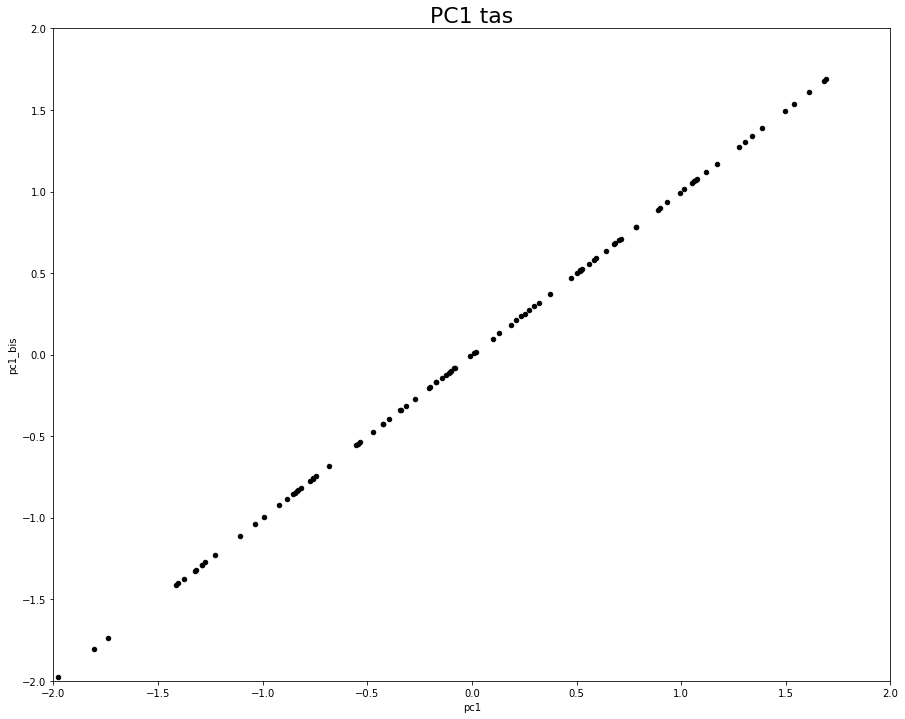

In [120]:
ax = plt.gca()
title = 'PC1 '+variable

df.plot(kind='scatter', x='pc1', y='pc1_bis', color='black', figsize=(15, 12), 
                     marker="o", ax = ax)
#plt.xlabel('Feedbacks (W.m^2)', fontsize=18)
#plt.ylabel('PC1 SW TOA fluxes', fontsize=18)
#plt.legend(['models', 'CERES dataset'])
plt.title(title, fontsize=22)
plt.ylim(-2.0,2.0)
plt.xlim(-2.0,2.0)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

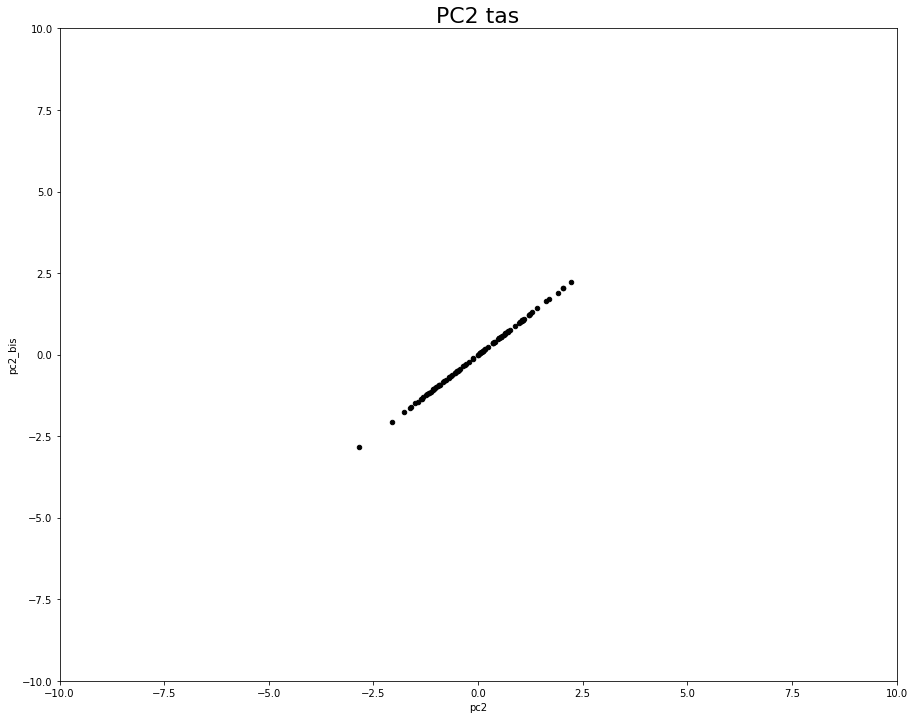

In [121]:
ax = plt.gca()
title = 'PC2 '+variable

df.plot(kind='scatter', x='pc2', y='pc2_bis', color='black', figsize=(15, 12), 
                     marker="o", ax = ax)
#plt.xlabel('Feedbacks (W.m^2)', fontsize=18)
#plt.ylabel('PC1 SW TOA fluxes', fontsize=18)
#plt.legend(['models', 'CERES dataset'])
plt.title(title, fontsize=22)
plt.ylim(-10,10)
plt.xlim(-10,10)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

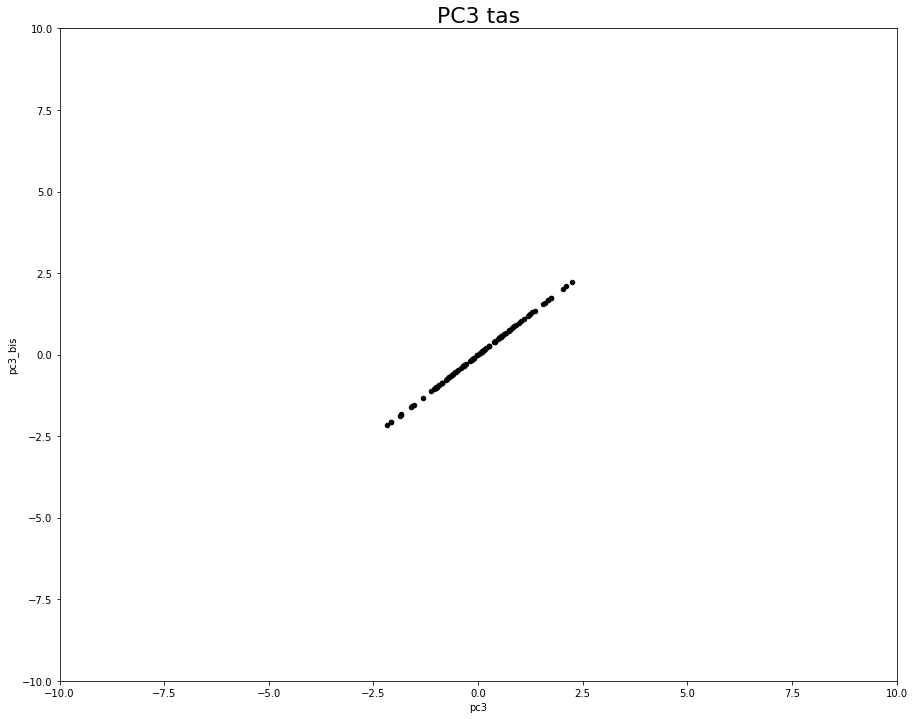

In [122]:
ax = plt.gca()
title = 'PC3 tas'

df.plot(kind='scatter', x='pc3', y='pc3_bis', color='black', figsize=(15, 12), 
                     marker="o", ax = ax)
#plt.xlabel('Feedbacks (W.m^2)', fontsize=18)
#plt.ylabel('PC1 SW TOA fluxes', fontsize=18)
#plt.legend(['models', 'CERES dataset'])
plt.title(title, fontsize=22)
plt.ylim(-10,10)
plt.xlim(-10,10)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [123]:
X_bis={}
for i in nb_p_list_LHS500 :
    X_bis[i] = X[i].expand_dims(dim={'dummy':range(0,102,1)})

X_bis[i]

<xarray.DataArray (dummy: 102, lat: 128, lon: 256)>
array([[[-0.20703125, -0.20703125, -0.20703125, ..., -0.20703125,
         -0.20703125, -0.20703125],
        [ 0.14167786,  0.14167786,  0.14167786, ...,  0.14167786,
          0.14167786,  0.14167786],
        [ 0.13491821,  0.13491821,  0.13491821, ...,  0.15660095,
          0.13491821,  0.13491821],
        ...,
        [-2.3478088 , -2.3478088 , -2.3478088 , ..., -2.3583374 ,
         -2.3478088 , -2.3478088 ],
        [-2.9790192 , -2.9790192 , -2.9790192 , ..., -2.9790192 ,
         -2.9790192 , -2.9790192 ],
        [-3.199646  , -3.199646  , -3.199646  , ..., -3.199646  ,
         -3.199646  , -3.199646  ]],

       [[-0.20703125, -0.20703125, -0.20703125, ..., -0.20703125,
         -0.20703125, -0.20703125],
        [ 0.14167786,  0.14167786,  0.14167786, ...,  0.14167786,
          0.14167786,  0.14167786],
        [ 0.13491821,  0.13491821,  0.13491821, ...,  0.15660095,
          0.13491821,  0.13491821],
        ...,
        [-2.3478088 , -2.3478088 , -2.3478088 , ..., -2.3583374 ,
         -2.3478088 , -2.3478088 ],
        [-2.9790192 , -2.9790192 , -2.9790192 , ..., -2.9790192 ,
         -2.9790192 , -2.9790192 ],
        [-3.199646  , -3.199646  , -3.199646  , ..., -3.199646  ,
         -3.199646  , -3.199646  ]],

       [[-0.20703125, -0.20703125, -0.20703125, ..., -0.20703125,
         -0.20703125, -0.20703125],
        [ 0.14167786,  0.14167786,  0.14167786, ...,  0.14167786,
          0.14167786,  0.14167786],
        [ 0.13491821,  0.13491821,  0.13491821, ...,  0.15660095,
          0.13491821,  0.13491821],
        ...,
        [-2.3478088 , -2.3478088 , -2.3478088 , ..., -2.3583374 ,
         -2.3478088 , -2.3478088 ],
        [-2.9790192 , -2.9790192 , -2.9790192 , ..., -2.9790192 ,
         -2.9790192 , -2.9790192 ],
        [-3.199646  , -3.199646  , -3.199646  , ..., -3.199646  ,
         -3.199646  , -3.199646  ]],

       ...,

       [[-0.20703125, -0.20703125, -0.20703125, ..., -0.20703125,
         -0.20703125, -0.20703125],
        [ 0.14167786,  0.14167786,  0.14167786, ...,  0.14167786,
          0.14167786,  0.14167786],
        [ 0.13491821,  0.13491821,  0.13491821, ...,  0.15660095,
          0.13491821,  0.13491821],
        ...,
        [-2.3478088 , -2.3478088 , -2.3478088 , ..., -2.3583374 ,
         -2.3478088 , -2.3478088 ],
        [-2.9790192 , -2.9790192 , -2.9790192 , ..., -2.9790192 ,
         -2.9790192 , -2.9790192 ],
        [-3.199646  , -3.199646  , -3.199646  , ..., -3.199646  ,
         -3.199646  , -3.199646  ]],

       [[-0.20703125, -0.20703125, -0.20703125, ..., -0.20703125,
         -0.20703125, -0.20703125],
        [ 0.14167786,  0.14167786,  0.14167786, ...,  0.14167786,
          0.14167786,  0.14167786],
        [ 0.13491821,  0.13491821,  0.13491821, ...,  0.15660095,
          0.13491821,  0.13491821],
        ...,
        [-2.3478088 , -2.3478088 , -2.3478088 , ..., -2.3583374 ,
         -2.3478088 , -2.3478088 ],
        [-2.9790192 , -2.9790192 , -2.9790192 , ..., -2.9790192 ,
         -2.9790192 , -2.9790192 ],
        [-3.199646  , -3.199646  , -3.199646  , ..., -3.199646  ,
         -3.199646  , -3.199646  ]],

       [[-0.20703125, -0.20703125, -0.20703125, ..., -0.20703125,
         -0.20703125, -0.20703125],
        [ 0.14167786,  0.14167786,  0.14167786, ...,  0.14167786,
          0.14167786,  0.14167786],
        [ 0.13491821,  0.13491821,  0.13491821, ...,  0.15660095,
          0.13491821,  0.13491821],
        ...,
        [-2.3478088 , -2.3478088 , -2.3478088 , ..., -2.3583374 ,
         -2.3478088 , -2.3478088 ],
        [-2.9790192 , -2.9790192 , -2.9790192 , ..., -2.9790192 ,
         -2.9790192 , -2.9790192 ],
        [-3.199646  , -3.199646  , -3.199646  , ..., -3.199646  ,
         -3.199646  , -3.199646  ]]], dtype=float32)
Coordinates:
  * dummy    (dummy) int64 0 1 2 3 4 5 6 7 8 9 ... 93 94 95 96 97 98 99 100 101
Dimensions without coordinates: lat, lon

In [124]:
U={}
for i in nb_p_list_LHS500 :
    U[i] = np.dot(eofs_inv,X_bis[i].transpose('lon','lat', 'dummy'))

U

{'p830': array([[[[ 1.2136192 ,  1.2136192 ,  1.2136192 , ...,  1.2136192 ,
            1.2136192 ,  1.2136192 ],
          [ 1.2247509 ,  1.2247509 ,  1.2247509 , ...,  1.2247509 ,
            1.2247509 ,  1.2247509 ],
          [ 1.2180662 ,  1.2180662 ,  1.2180662 , ...,  1.2180662 ,
            1.2180662 ,  1.2180662 ],
          ...,
          [ 1.2300184 ,  1.2300184 ,  1.2300184 , ...,  1.2300184 ,
            1.2300184 ,  1.2300184 ],
          [ 1.2323369 ,  1.2323369 ,  1.2323369 , ...,  1.2323369 ,
            1.2323369 ,  1.2323369 ],
          [ 1.2245997 ,  1.2245997 ,  1.2245997 , ...,  1.2245997 ,
            1.2245997 ,  1.2245997 ]],
 
         [[-0.6098294 , -0.6098294 , -0.6098294 , ..., -0.6098294 ,
           -0.6098294 , -0.6098294 ],
          [-0.58436596, -0.58436596, -0.58436596, ..., -0.58436596,
           -0.58436596, -0.58436596],
          [-0.5223042 , -0.5223042 , -0.5223042 , ..., -0.5223042 ,
           -0.5223042 , -0.5223042 ],
          ...,
     

In [125]:
shape(eofs_inv)

(256, 5, 128)

In [126]:
U['p830']

array([[[[ 1.2136192 ,  1.2136192 ,  1.2136192 , ...,  1.2136192 ,
           1.2136192 ,  1.2136192 ],
         [ 1.2247509 ,  1.2247509 ,  1.2247509 , ...,  1.2247509 ,
           1.2247509 ,  1.2247509 ],
         [ 1.2180662 ,  1.2180662 ,  1.2180662 , ...,  1.2180662 ,
           1.2180662 ,  1.2180662 ],
         ...,
         [ 1.2300184 ,  1.2300184 ,  1.2300184 , ...,  1.2300184 ,
           1.2300184 ,  1.2300184 ],
         [ 1.2323369 ,  1.2323369 ,  1.2323369 , ...,  1.2323369 ,
           1.2323369 ,  1.2323369 ],
         [ 1.2245997 ,  1.2245997 ,  1.2245997 , ...,  1.2245997 ,
           1.2245997 ,  1.2245997 ]],

        [[-0.6098294 , -0.6098294 , -0.6098294 , ..., -0.6098294 ,
          -0.6098294 , -0.6098294 ],
         [-0.58436596, -0.58436596, -0.58436596, ..., -0.58436596,
          -0.58436596, -0.58436596],
         [-0.5223042 , -0.5223042 , -0.5223042 , ..., -0.5223042 ,
          -0.5223042 , -0.5223042 ],
         ...,
         [-0.74917793, -0.74917793

In [127]:
U_avg={}
for i in nb_p_list_LHS500 :
    U[i] = xr.DataArray(U[i], dims=['lon','eofs','lon2', 'dummy'])
    U_avg[i] = U[i][0,:,0,0].transpose()

U_avg

{'p830': <xarray.DataArray (eofs: 5)>
 array([ 1.2136192, -0.6098294,  1.9897791, -1.6556445,  0.8839032],
       dtype=float32)
 Dimensions without coordinates: eofs, 'p831': <xarray.DataArray (eofs: 5)>
 array([ 1.0120285, -1.0892862,  0.9767731, -0.479844 ,  0.7853311],
       dtype=float32)
 Dimensions without coordinates: eofs, 'p832': <xarray.DataArray (eofs: 5)>
 array([ 0.8543407 , -0.9796179 ,  0.32075801,  0.1599607 ,  1.1866205 ],
       dtype=float32)
 Dimensions without coordinates: eofs, 'p833': <xarray.DataArray (eofs: 5)>
 array([ 0.5299683 , -0.13121139,  0.25907466,  0.94177157,  2.2121    ],
       dtype=float32)
 Dimensions without coordinates: eofs, 'p834': <xarray.DataArray (eofs: 5)>
 array([ 0.20738026, -0.55950236, -0.6820719 ,  1.0935107 ,  1.6499455 ],
       dtype=float32)
 Dimensions without coordinates: eofs, 'p835': <xarray.DataArray (eofs: 5)>
 array([ 0.39946637, -1.1224369 , -0.48563376,  0.5891387 ,  1.6797179 ],
       dtype=float32)
 Dimensions with

In [128]:
#Save the U_avg 
for i in nb_p_list_LHS500 :
    np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE4_selection/files/npy/U_'+i+'_'+variable+'.npy', U_avg[i])